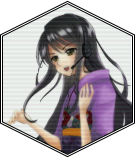

In [1]:
from IPython.display import Image, display
Image("ryoko.png", width="70")

# The Final Stage

*Dr. Ryoko is stuck in the quantum multiverse due to noise clusters interfering with her device. <br/>
Please DM Dr. Ryoko and ask her about the **noise clusters** and you will find out more. <br/>
Dr. Ryoko is trying to clear noise clusters with her laser beams, but has only 3 shots left.<br/>
To make matters worse, there seems to be one area (board) that cannot be cleared within 3 shots. <br/>
Help Dr. Ryoko identify that one area (board) with noise clusters that **cannot be cleared within 3 shots**. Good luck!<br/>*

[<< Click here to communicate with Dr. Ryoko through the web cam >>](https://youtu.be/Bkk5-j6rpoM)

*You can do this by learning how to solve a famous classic puzzle called “Asteroids puzzle”.*

Jump to [solution](#Solution)...

# Week3: False Asteroids
Asteroids is a famous puzzle with the following setup and rules:
- The asteroids are placed on a grid.
- The objective is to destroy all the asteroids by shooting laser beams: either vertically or horizontally.
- Determine how to destroy all the asteroids by shooting no more than the specified number of beams.

The following image is an example of an Asteroids puzzle. In this example, the board size is 4 × 4 and we have six asteroids.

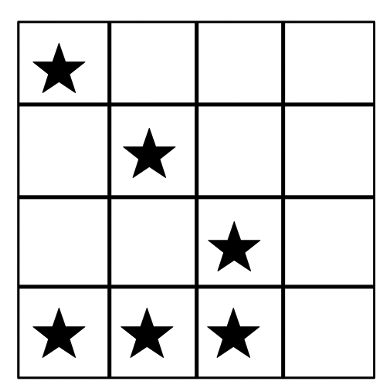

In [6]:
Image('asteroids_example.png')

As shown below, we can destroy all the asteroids by shooting 3 lasers vertically. Each thick blue line represents a laser beam. 

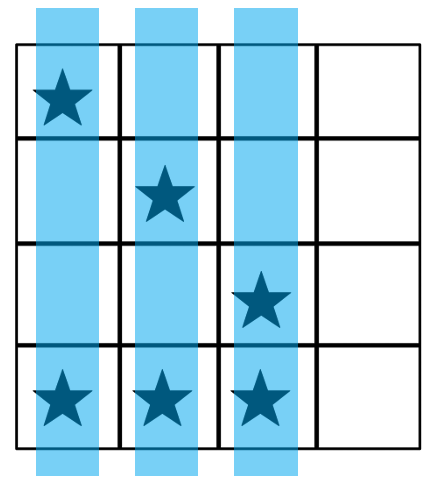

In [4]:
Image('asteroids_beam_example.png')

There are also false Asteroid problems. An Asteroid problem is false if the asteroids cannot be cleared within the specified number of beams. The following example is a false Asteroid problem with 3 laser beams.

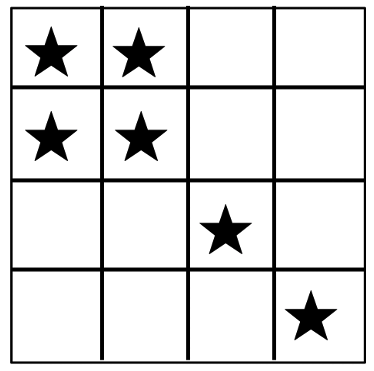

In [5]:
Image('false_asteroids_example.png')

----------
# Final Exercise
There are 16 areas (boards) that Dr. Ryoko needs to clear, each of which has 6 noise clusters that correspond to an asteroid in "Asteroids puzzle". However, there happens to be one area that cannot be cleared within three laser shots! Use Grover's algorithm you learned in Weeks 1 & 2 to find that one area (board)!

A board with asteroids is represented with a list of tuples. Each tuple represents the coordinate of an asteroid in the format `[row index, column index]`. Therefore, a board according to the following image can be represented as:

```
[['0', '0'], ['1', '1'], ['2', '2'], ['3', '0'], ['3', '1'], ['3', '2']]
```


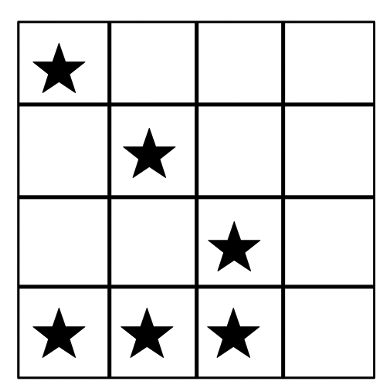

In [7]:
Image('asteroids_example.png')

There are 16 areas (boards) with the following configurations.
Find the area that cannot be cleared with 3 laser shots by using Grover's algorithm to help Dr. Ryoko!

# Solution

As it was shown in the hint, the problem that hides behind asteroid shooting is actually the **Vertex Cover** problem.

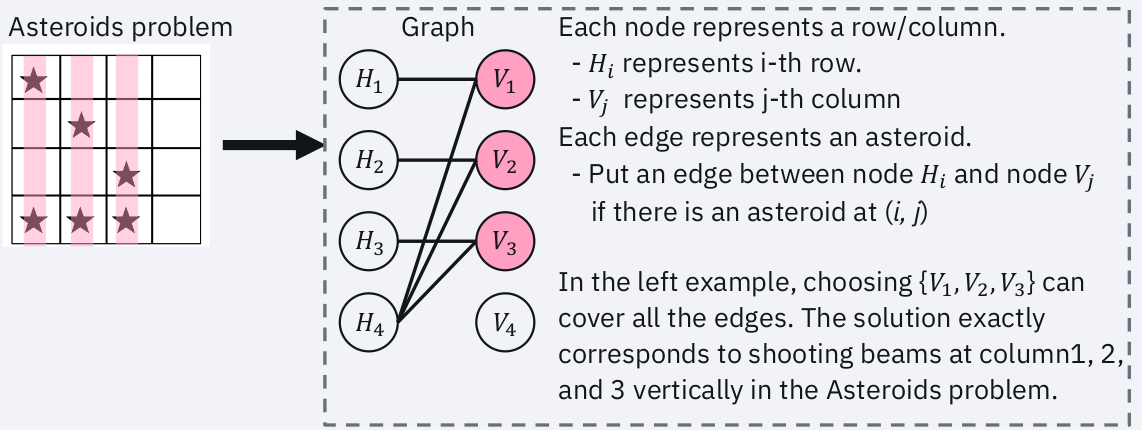

In [5]:
from IPython.display import Image, display
Image("figures/asteroid_vertex_cover.png", width="700")


This problem is NP-complete in the general case, P in the bipartite case we have here, but then hard again if we have constraints on the size of the vertex as we also have in this case.

A first approach to solve this is to basically repeat the double Grover approach of the previous exercise, which is however not easy to do within the 28 qubits limit. 

## Number of Qubits and Quantum Register Layouts 
A naive approach needs
1. 4 Qubits to address 16 Boards in qRAM
2. 16 Qubits to store the Boards in the qRAM
3. 8 Qubits to store a solution candidate (4 horizontal beams and 4 vertical beams)

...such that we already are at the limit of 28 without having any more left for output or ancillas.

One could argue that this problem representation is too wasteful. Calculating the possible number of configurations yields
1. $\binom{16}{6}=8008$ ways to put 6 asteroids on a 4x4=16 grid 
2. $\binom{8}{3}=56$ possible ways to shoot 3 laser beams along the columns or rows

Consequently, a lower bound on the number of needed qubits for 1. is 13 and 6 qubits for 2. Including the address qubits, this leaves us with 23 qubits, hence 5 are remaining for oracle output and ancilla. This might work, however, it is completely unclear how to work with such a maximally compact problem representation and how to actually find it in the first place.

Furthermore, the double Grover approach leads to a rather large circuit size and cost while this final exercise is all about getting the circuit cost as low as possible. Therefore we have to sacrifice the straigtfowardness and generalizability (e.g. in therms of number of asteroids, beam configurations, board layout) of the nested Grover approach and tailor the solution to this specific problem instance.

## Solution approach
The simplest approach to solve the exercise is to look at number of beam configurations $\binom{8}{3}=56$, which is, unlike the number of board configurations, in very tractable value range and translate those explicitely into an oracle. (Of course this approach will not scale well since $\binom{2n}{n-1}$ still grows rather fast)

The following procedure is somewhat similiar to lights out oracle in the previous exercise where a single switch will flip some subset of the lights on the board. After application of all the switches we check, whether the board is all ones/zeros. Here, the lasers correspond to the switches. Concerning cost efficiency and the qubit limit two issues must be addressed:

1. Instead of just flipping a qubit associated with an asteroid field, only fields actually containing an asteroid must be flipped from one to zero while others must remain zero. This requires checks in reversible classical logic with quite some overhead in terms of necessary CNOT gates.
2. Checking the whole board consisting of 16 qubits using multi-controlled NOT (MCT) gates either requires 15 ancilla qubits, exceeding the qubit limit, or a greatly enlarged circuit if no ancillas are used

Both issues can be solved by not looking at the whole board but only at the part that is **not** covered by the specific beam configuration. In that case we only have to check whether there are still asteroids *remaining* in the tiles uncovered by some laser beam configurations. For the 3x3 case with 2 beams this is illustrated in the following drawing.

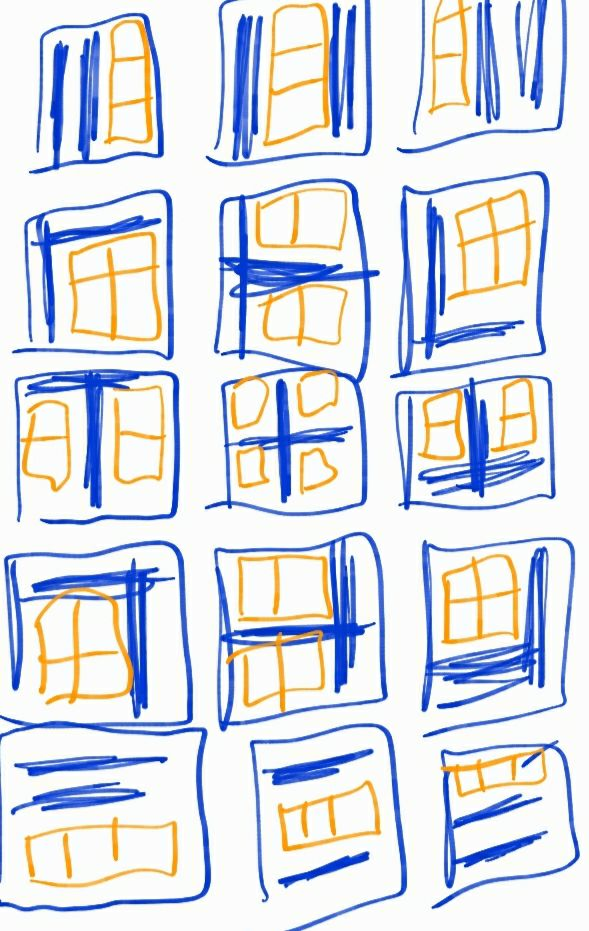

In [10]:
Image("figures/asteroid_cover.jpg", width="250")

The number of uncovered tiles in the 3x3 case is either 3 or 4 while in the 4x4 case it is either 4 or 6.
Hence, to find the Board that is not solvable with 3 laser beams (or equivalently a vertex cover of size at most 3) we check for every beam configuration if the corresponding *uncovered* tiles are all ones and apply the (-1) phase if that is the case. (Remark: This assumes uniqueness of the solution, otherwise some false positives are created)

The only board not receiving the phase factor will then be be the unsolvable one and as noted in previous solutions, this is up to an irrelevant global phase factor equivalent to the "text book Grover default state" where only the solution receive the phase factor.

## Further improvements and final remarks
As it becomes apparent from the above drawing, there are a lot of symmetries in the beam configurations and uncovered tiles. Many configurations are just mirror images or rotations of others which indicates that there is still much space for improvements and circuit cost cutting when choosing a better problem representation. However, taken into account the time budget given for this exercise and due to working full time only being able to work at night, this is as far as I went with my solution.

The winning contributions to the challenge indicate that interpreting the board as adjacency matrix for the vertex cover and checking via easily computable matrix properties if a decomposition using a permutation matrix is the correct way to make use of the mentiondes symmetries.

In [1]:
problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

In [2]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

**Generic Diffuser**

In [3]:
def diffuser(qc, diffusion_qubits, ancilla_qubits=None):

    if ancilla_qubits is not None:
        assert len(ancilla_qubits) >= len(diffusion_qubits) - 2

    # Apply transformation |s> -> |00..0> (H-gates)
    qc.h(diffusion_qubits)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    qc.x(diffusion_qubits)

    # Do multi-controlled-Z gate
    qc.h(diffusion_qubits[-1])

    if ancilla_qubits is not None:
        qc.mct(diffusion_qubits[:-1], diffusion_qubits[-1], ancilla_qubits, mode='basic')
    else:
        qc.mct(diffusion_qubits[:-1], diffusion_qubits[-1])

    qc.h(diffusion_qubits[-1])

    # Apply transformation |11..1> -> |00..0>
    qc.x(diffusion_qubits)
    # Apply transformation |00..0> -> |s>
    qc.h(diffusion_qubits)
    # We will return the diffuser as a gate


def diffuser_gate(nqubits, use_ancillas=False):
    diffusion_qubits = QuantumRegister(nqubits, name='out')

    if use_ancillas:
        ancilla_qubits = QuantumRegister(nqubits - 2, name='ancilla')
        qc = QuantumCircuit(diffusion_qubits, ancilla_qubits)
    else:
        ancilla_qubits = None
        qc = QuantumCircuit(diffusion_qubits)

    diffuser(qc, diffusion_qubits, ancilla_qubits)

    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

### Auxiliary functions
- ```find_closest_string```: Finding the optimal qRAM initial state
- ```board2_bitstrings```: Converting the board layout to a bistring
- ```kbits```: Generate all bitstring of length $n$ with $k$ bits set, used to generate the beam configurations
- ```compute_uncovered_tiles```: For a given beam configuration given by n-k-bitstring, create a list with indices of the uncovered tiles

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

def find_closest_string(strings):
    length = len(strings[0])
    min_dist = 1000
    min_string = None

    for i in range(int(2 ** length)):
        bits = [int(a) for a in format(i, f"0{length}b")]
        dist = sum([distance.hamming(bits, s) for s in strings])
        if dist < min_dist:
            min_dist = dist
            min_string = bits

    return min_string, min_dist


def board2_bitstrings(asteroid_boards, board_size=4):
    strings = []

    for ast_idx in asteroid_boards:
        board = np.zeros((board_size, board_size), dtype=np.uint8)
        for idx in ast_idx:
            board[int(idx[0]), int(idx[1])] = 1
        strings.append(board.flatten().tolist())

    return strings


def kbits(n, k):
    import itertools

    result = []
    for bits in itertools.combinations(range(n), k):
        s = [0] * n
        for bit in bits:
            s[bit] = 1
        result.append(s)

    return result


def compute_uncovered_tiles(beamstring):
    board_size = len(beamstring) // 2
    vertical = np.array(beamstring[:board_size])
    horizontal = np.array(beamstring[board_size:])

    coord2num = lambda i, j: board_size * i + j

    uncovered_v = vertical == 0
    uncovered_h = horizontal == 0

    uncovered_tiles = []

    for i, h in enumerate(uncovered_h):
        for j, v in enumerate(uncovered_v):
            if v and h:
                uncovered_tiles.append(coord2num(i, j))

    return uncovered_tiles

**Write qRAM function**

In [5]:
def init_light_states(qc, lights, light_qubits):
    for i, light in enumerate(lights):
        if light == 0:
            qc.x(light_qubits[i])


def write_qram(boards, qc, address_qubits, data_qubits, ancilla_qubits=None):

    num_address_bits = len(address_qubits)
    closest_lights, _ = find_closest_string(boards)
    init_light_states(qc, closest_lights, data_qubits)

    num_ancillas = max(0, num_address_bits - 2)

    for n, board in enumerate(boards):
        for ab, bit in enumerate(format(n, f"0{num_address_bits}b")):
            if bit == '0':
                qc.x(address_qubits[ab])

        switches = np.equal(board, closest_lights)

        for db, switch in enumerate(switches):
            if not switch:
                if num_address_bits == 2:
                    qc.rccx(address_qubits[0], address_qubits[1], data_qubits[db])
                else:
                    if ancilla_qubits is not None and num_ancillas > 0:
                        qc.mct(address_qubits, data_qubits[db], ancilla_qubits[:num_ancillas], mode='basic')
                    else:
                        qc.mct(address_qubits, data_qubits[db])

        for ab, bit in enumerate(format(n, f"0{num_address_bits}b")):
            if bit == '0':
                qc.x(address_qubits[ab])

## Implementation of the oracle
```single_beam_check```: Given a beam configuration represented by ```beamstring``` connect the oracle output qubit and the corresponding uncovered asteroid field tiles via a MCT gate. This function can be interpreted as some sort of sub oracle.

```beam checker```: Generate all beam configuration and call ```single_beam_check``` for each to create the necessary connection in the circuit

In [6]:
def single_beam_check(beamstring, qc, board_qubits, output_qubit, ancilla_qubits=None):

    qubit_idx = compute_uncovered_tiles(beamstring)
    num_controls = len(qubit_idx)
    num_ancillas = num_controls - 2

    control_qubits = [board_qubits[i] for i in qubit_idx]

    if ancilla_qubits is not None and num_ancillas > 0:
        qc.mct(control_qubits, output_qubit, ancilla_qubits[:num_ancillas], mode='basic')
    else:
        qc.mct(control_qubits, output_qubit)


def beam_checker(qc, board_qubits, output_qubit, ancilla_qubits=None):

    board_size = len(board_qubits)
    board_dim = int(np.sqrt(board_size))

    beamstrings = kbits(2 * board_dim, board_dim - 1)

    for b in beamstrings:
        single_beam_check(b, qc, board_qubits, output_qubit, ancilla_qubits)

Answer by creating a quantum circuit to solve the puzzle shown with the problem set above. In the quantum circuit to be submitted, measure **only the `solution` (4bit)** that solves the puzzle. <br/>
To submit your solution, create a function that takes `problem_set` as an input and then returns a  `QuantumCircuit`.  You can name the function as you like. Make sure it works even with another dataset of "problem_set". We will validate your circuit with different inputs.<br/>
Make a circuit that gets the correct answer at a low cost. The lower the cost, the better.

## <span style="color: red; ">IMPORTANT: Final exercise submission rules</span>

**For solving this problem:**<br/>
- **Please implement the quantum circuit within <span style="color: red; ">28 qubits.</span>**<br/>
- Use **Grover's algorithm** you learned in Week1 & 2 with **<span style="color: red; ">iteration ＝ 1.</span>**
- The initial state for Grover's algorithm must be equal probability distributions. For example, if you want use only 3 computational bases for 2 qubits instead of 4 as the initial state. Then, the state will be $\sqrt\frac{1}{3} (|00\rangle + |01\rangle + |11\rangle)$

- Please note that you can get the answer with the same endian as the one used in Week2 explanation. You should map the index of the problem into four classical registers *`c[0:4]`* in binary. `c[0]` is the highest bit and `c[3]` is the lowest bit. For example, when mapping 12, the furthest left bit of the `1100` will be mapped to `c[0]`.
- Make sure you **create an oracle** that **doesn't require any knowledge of what the answers are**. (For example, you are not allowed to create an oracle by using a classical optimization solver to get your answers for it.)  
- With the exception of the Unroller, which is required for decomposing your circuit to calculate quantum costs, you are not allowed to use any existing transpiler passes nor original transpilers for making simplifications in this competition.
- Please **do not run jobs in succession** even if you are concerned that your job is not running properly. This can create a long queue and clog the backend. You can check whether your job is running properly at:<br/>
https://quantum-computing.ibm.com/results  
- Your score for this exercise will be same as the cost of your QuantumCircuit. The lower the cost, the better.
- Judges will check top 10 solutions manually to see if their solutions adhere to the rules. **Please note that your ranking is subject to change after the challenge period as a result of the judging process.**
- Top 10 participants will be recognized and asked to submit a write up on how they solved the exercise.

## Putting everything together
With the oracle provided by the ```beam_checker``` function, this is just the generic qRAM + Grover Search Circuit setup.

In [7]:
def week3_ans_func(problem_set):
    ##### build your quantum circuit here
    ##### In addition, please make it a function that can solve the problem even with different inputs (problem_set). We do validation with different inputs. 
    
    #### Code for Grover's algorithm with iterations = 1 will be as follows. 
    #### for i in range(1):
    ####   oracle()
    ####   diffusion()
    boards = board2_bitstrings(problem_set) 
    
    board_qubits = QuantumRegister(16, name='board')
    address_qubits = QuantumRegister(4, name='address')
    ancilla_qubits = QuantumRegister(7, name='ancilla')
    output_qubit = QuantumRegister(1, name='out')
    cbits = ClassicalRegister(4, name="cbits")
    qc = QuantumCircuit(board_qubits, address_qubits, ancilla_qubits, output_qubit, cbits)

    # Initialization
    # Flag to |->
    qc.x(output_qubit)
    qc.h(output_qubit)

    # Address to |++++>
    qc.h(address_qubits)

    write_qram(boards, qc, address_qubits, board_qubits, ancilla_qubits)
    qc.barrier()

    beam_checker(qc, board_qubits, output_qubit, ancilla_qubits)

    qc.barrier()

    write_qram(boards, qc, address_qubits, board_qubits, ancilla_qubits)
    qc.barrier()

    diffuser(qc, address_qubits)

    qc.barrier()
    qc.measure(address_qubits, cbits)

    #qc = qc.reverse_bits()

    return qc

In [8]:
# Submission code
from qc_grader import grade_ex3, prepare_ex3, submit_ex3

# Execute your circuit with following prepare_ex3() function.
# The prepare_ex3() function works like the execute() function with only QuantumCircuit as an argument.
job = prepare_ex3(week3_ans_func)

result = job.result()
counts = result.get_counts()
original_problem_set_counts = counts[0]

original_problem_set_counts
# The bit string with the highest number of observations is treated as the solution.

Running week3_ans_func...
Computing cost...
Starting experiments. Please wait...
You may monitor the job (id: 5fc2d945d3dc27001a673cf2) status and proceed to grading when it successfully completes.


{'0000': 31,
 '0001': 36,
 '0010': 31,
 '0011': 34,
 '0100': 39,
 '0101': 479,
 '0110': 34,
 '0111': 30,
 '1000': 36,
 '1001': 27,
 '1010': 44,
 '1011': 40,
 '1100': 42,
 '1101': 25,
 '1110': 32,
 '1111': 40}

As we can see, the correct board ```'0101': 479``` clearly stands out even when, as demanded, only one Grover iteration is used.

In [9]:
# Check your answer by executing following code.
# The quantum cost of the QuantumCircuit is obtained as the score. The lower the cost, the better.
grade_ex3(job)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 58437.
The lower your score the better!
Feel free to submit your answer.


...and we also get a decently low score. At submission time this amounted to the 35th best solution. Towards the deadline it unfortunately fell to place 95. Nevertheless, the [badge](https://www.youracclaim.com/badges/11411d36-6664-4a1b-ae41-be01a95a680a) was successfully earned. :) 

In [10]:
# Submit your results by executing following code. You can submit as many times as you like during the period. 
submit_ex3(job)

Submitting your answer. Please wait...

Success 🎉! Your answer has been submitted.
Congratulations! You have rescued Dr. Ryoko from the quantum realm. The bright "quantum future" is ahead.


... and finally also the Anime-like story line this challenge was embedded comes to a conclusion.